Question 2e

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = np.genfromtxt("hw5_train.csv", delimiter=',')
X_train = np.asarray(train_data[:,:2])
y_train = train_data[:, 2]
y_train = np.where(y_train == 0, -1, y_train)

test_data = np.genfromtxt("hw5_test.csv", delimiter=',')
X_test = np.asarray(test_data[:,:2])
y_test = test_data[:, 2]
y_test = np.where(y_test == 0, -1, y_test)

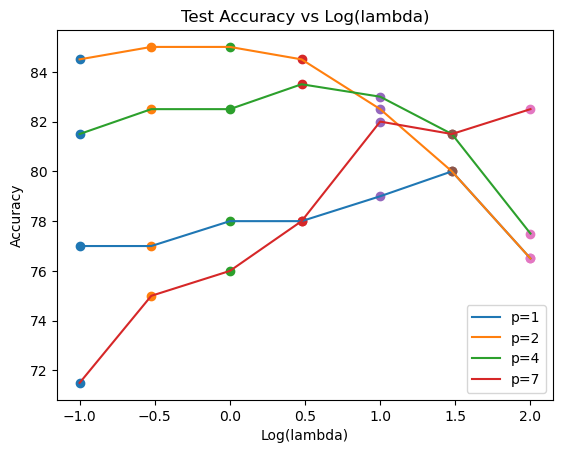

In [3]:
lam = [0, 0.3, 1, 3, 10, 30, 100]
degrees = [1, 2, 4, 7]
dic = {}
p1 = []
p2 = []
p4 = []
p7 = []

for l in lam:
    test_acc = []
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)

        lin_reg = Ridge(alpha=l, fit_intercept=False)
        lin_reg.fit(X_train_poly, y_train)

        y_train_pred = np.where(lin_reg.predict(X_train_poly) > 0, 1, -1)
        mse_train = mean_squared_error(y_train, y_train_pred)
        train_accuracy = accuracy_score(y_train, y_train_pred)

        y_test_pred = np.where(lin_reg.predict(X_test_poly) > 0, 1, -1)
        mse_test = mean_squared_error(y_test, y_test_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        test_acc.append(test_accuracy*100)

    if l == 0:
        dic[-1] = test_acc
    else:
        dic[np.log10(l)] = test_acc

x = list(dic.keys())
fig, ax = plt.subplots()

for key, value in dic.items():
    ax.scatter([key]*4, value)

a = dic.values()
b = []
for i in a:
    b.append(i)

c = dic.keys()
d = []
for j in c:
    d.append(j)

s = np.asarray(b)
p1 = s[:, 0]
p2 = s[:, 1]
p4 = s[:, 2]
p7 = s[:, 3]

ax.plot(d, p1, label="p=1")
ax.plot(d, p2, label="p=2")
ax.plot(d, p4, label="p=4")
ax.plot(d, p7, label="p=7")

ax.legend()
ax.set_xlabel('Log(lambda)')
ax.set_ylabel('Accuracy')
ax.set_title('Test Accuracy vs Log(lambda)')
plt.show()

2f. The Accuracy of test and train data for lower values of lambda remains similar to the ones seen from the previous experiment i.e., without regularization. But we can see the regularization effects at higher lambda values i.e., for lambda=100, and correspondingly increase in test accuracy and decrease in overfitting and overall a better performance. This is because the effect of regularization depends on the value of lambda, the lower the value of lambda lesser the effect of regularization, and vice-versa. 

2g. After we create an instance of the LinearRegression class and call the fit method with the input features and target values as arguments, we can obtain the trained weight vector w by accessing the coef_ attribute of the LinearRegression object. Note that the coef_ attribute returns an array of shape (n_features,), where n_features is the number of input features. The weight vector w contains the coefficients of the linear model, with one weight for each input feature. Here's the code for getting the weight vector: w = lr.coef_